In [15]:
import pandas as pd #mengubah dimensi data membaca data
import numpy as np #memudahkan operasi perhitungan data
import seaborn as sns #menampilkan visualisasi data
import matplotlib.pyplot as plt #membuat chart
from sklearn.cluster import KMeans #ambil algoritma KMeans
from sklearn.preprocessing import MinMaxScaler #Normalisasi data 

In [16]:
gizi = pd.read_excel("dataset_gizi.xlsx") #membaca CSV
gizi.head() #menampilkan 5 data teratas


,No,Balita ke-,TB,BB
0,1,Balita 1,52.0,5.8
1,2,Balita 2,51.0,5.0
2,3,Balita 3,71.5,8.5
3,4,Balita 4,55.0,5.5
4,5,Balita 5,92.5,6.5


In [17]:
gizi.info() #mendapatkan fitur yang ada pada data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   No          10 non-null     int64  
 1   Balita ke-  10 non-null     object 
 2   TB          10 non-null     float64
 3   BB          10 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 448.0+ bytes


In [23]:
gizi_x = gizi.iloc[:, 2:4] 
gizi_x.head()

,TB,BB
0,52.0,5.8
1,51.0,5.0
2,71.5,8.5
3,55.0,5.5
4,92.5,6.5


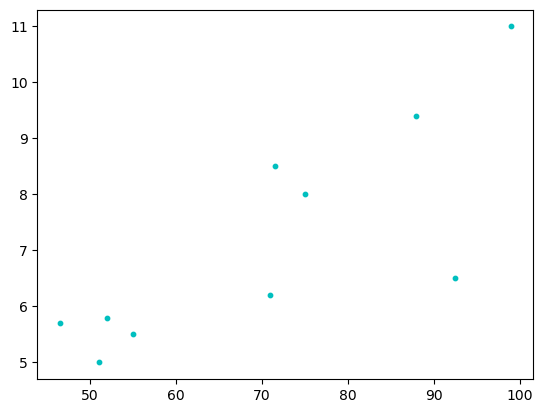

In [24]:
plt.scatter(gizi.TB, gizi.BB, s =10, c = "c", marker = "o", alpha = 1)
plt.show()

In [25]:
x_array = np.array(gizi_x) #ubah data tinggi dan berat badan menjadi sebuah array
print(x_array)

[[52.   5.8]
 [51.   5. ]
 [71.5  8.5]
 [55.   5.5]
 [92.5  6.5]
 [46.5  5.7]
 [75.   8. ]
 [99.  11. ]
 [88.   9.4]
 [71.   6.2]]


In [26]:
scaler = MinMaxScaler() #melakukan normalisasi data
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[0.1047619 , 0.13333333],
       [0.08571429, 0.        ],
       [0.47619048, 0.58333333],
       [0.16190476, 0.08333333],
       [0.87619048, 0.25      ],
       [0.        , 0.11666667],
       [0.54285714, 0.5       ],
       [1.        , 1.        ],
       [0.79047619, 0.73333333],
       [0.46666667, 0.2       ]])

In [27]:
kmeans = KMeans(n_clusters = 5, random_state= 111) #membuat 5 cluster dan pemilihan data testing tidak akan berubah
kmeans.fit(x_scaled)


KMeans(n_clusters=5, random_state=111)

In [28]:
print(kmeans.cluster_centers_)

[[0.08809524 0.08333333]
 [0.50952381 0.54166667]
 [0.8952381  0.86666667]
 [0.46666667 0.2       ]
 [0.87619048 0.25      ]]


In [30]:
print(kmeans.cluster_centers_)
gizi["cluster"] =kmeans.labels_
gizi.head(10)

[[0.08809524 0.08333333]
 [0.50952381 0.54166667]
 [0.8952381  0.86666667]
 [0.46666667 0.2       ]
 [0.87619048 0.25      ]]


,No,Balita ke-,TB,BB,cluster
0,1,Balita 1,52.0,5.8,0
1,2,Balita 2,51.0,5.0,0
2,3,Balita 3,71.5,8.5,1
3,4,Balita 4,55.0,5.5,0
4,5,Balita 5,92.5,6.5,4
5,6,Balita 6,46.5,5.7,0
6,7,Balita 7,75.0,8.0,1
7,8,Balita 8,99.0,11.0,2
8,9,Balita 9,88.0,9.4,2
9,10,Balita 10,71.0,6.2,3


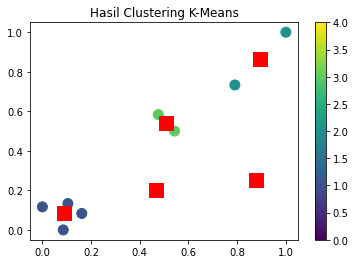

In [93]:
output = plt.scatter(x_scaled[:,0], x_scaled[:,1], s = 100, c = gizi.cluster, marker = "o", alpha = 1,)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=1, marker='s');

plt.title("Hasil Clustering K-Means")
plt.colorbar(output)

plt.show()